# Agriculture Dataset Analysis

In [6]:
#Import all the libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import statistics as st
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [7]:
#reading CSV file
df=pd.read_csv("agriculture.csv")

After downloading the CSV file, we used Pandas' CSV reading function. We wanted to have a general idea of our dataset by calling the first 10 rows. 

### Exploratory Data Analysis (EDA)

In [8]:
df.head(10) #seeing top 10 enteries of the data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
7,F00000010,577,1,0,1,0,0.0,0,1,2
8,F00000012,731,0,0,1,0,0.0,0,2,0
9,F00000020,1132,1,0,1,0,0.0,0,1,2


As a first step, the libraries that will be used throughout the analysis are imported. After downloading the CSV file, we used Pandas' CSV reading function. We wanted to have a general idea of the data by calling the first 10 lines of the data.

In [9]:
df.shape

(88858, 10)

In [10]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

The dataset consists of 88858 observations and 10 features. One of these features is our target class. The data set consists of integers, float and objects. Since we want to predict the cause of the damage to the crop, the target class is crop damage.

In [11]:
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [12]:
missing_value_formats = ["n.a","?","NA","n/a","na","--"," "]
data = pd.read_csv("agriculture.csv", na_values = missing_value_formats)
data = df.replace('na',np.NaN)
df.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
7,F00000010,577,1,0,1,0,0.0,0,1,2
8,F00000012,731,0,0,1,0,0.0,0,2,0
9,F00000020,1132,1,0,1,0,0.0,0,1,2


In [13]:
skewness = df.skew()
print(skewness)

Estimated_Insects_Count    0.839146
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.962879
Number_Weeks_Used          0.244592
Number_Weeks_Quit          0.892773
Season                     0.145228
Crop_Damage                2.367816
dtype: float64


There are 9000 missing values in the data and the first step in handling the missing values, we replace them with NaN. Since the data is close to symmetrical distribution, we can consider replacing the missing values with one of the central tendency measures.

In [14]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [15]:
df= df.fillna(df.mean())
df.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.00000,0,1,0
1,F00000003,209,1,0,1,0,0.00000,0,2,1
2,F00000004,257,1,0,1,0,0.00000,0,2,1
3,F00000005,257,1,1,1,0,0.00000,0,2,1
4,F00000006,342,1,0,1,0,0.00000,0,2,1
5,F00000008,448,0,1,1,0,28.62397,0,2,1
6,F00000009,448,0,1,1,0,28.62397,0,2,1
7,F00000010,577,1,0,1,0,0.00000,0,1,2
8,F00000012,731,0,0,1,0,0.00000,0,2,0
9,F00000020,1132,1,0,1,0,0.00000,0,1,2


In [16]:
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

After finding the mean, standard deviation and 5 numbers summary, once again we observe how close mean and median are. This shows us that we can confidently replace the missing values with the mean. After replacing the NaNs with mean, as we can see, we don’t have the missing values in the data.

In [17]:
df_duplicated_rows=df[df.duplicated()] 

In [18]:
df_duplicated_rows.shape

(0, 10)

We check the duplicated rows and see that there is no duplicated rows in the data.

In [19]:
df['Crop_Damage'].value_counts() #OUR TARGET VARIABLE CROP_DAMAGE # 0=ALIVE 1=OTHER REASONS 2=PESTICIDES

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

From the above code we can conclude that out of 88858 rows (that we got from the code ‘df.shape’),  74238 are alive, and 12307 had been afected by other reasons that cause crop damage, only 2313 suffered the consecuences of the pesticides.

We want to visualize the data better based on the crop damaged.

In [17]:
df['Crop_Type']= df['Crop_Type'].astype(str)

          Chances to crop damange based on crop type   


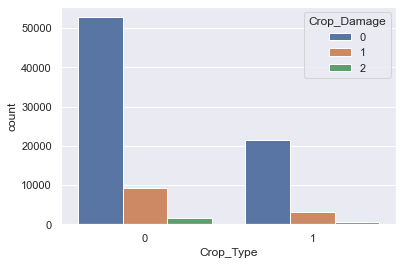

In [62]:
sns.countplot(x = 'Crop_Type', hue = 'Crop_Damage', data = df)
print('          Chances to crop damange based on crop type   ')

Crop type 0 has higher chance of survival compared to crop type 1 crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)

              Crop Damage vs Soil Type


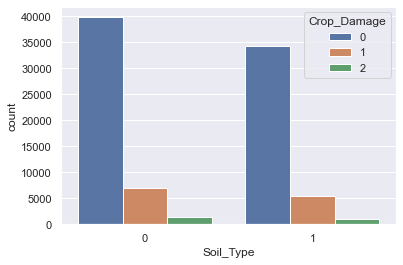

In [64]:
sns.countplot(x = 'Soil_Type', hue = 'Crop_Damage', data = df)
print('              Chances to crop damange based on Soil type')

Soil type 0 has a higher survial rate for Crop compared to soil type 1

(0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)

              Chances to crop damange based on Pesticides Use Category


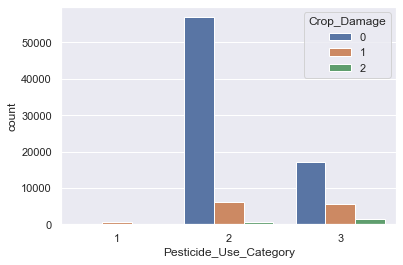

In [67]:
sns.countplot(x = 'Pesticide_Use_Category', hue = 'Crop_Damage', data = df)
print('              Chances to crop damange based on Pesticides Use Category')

Pesticide category 1 has no impact on Crop survival. Means if there is less data to determine that no pesticide has any impact on crop survival.
Pesticide category 2 is the best for Crops compared to the other ones.


(0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)

              Chances to crop damange based on Season


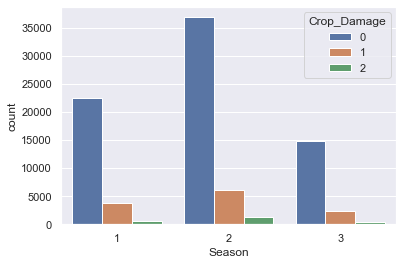

In [70]:
sns.countplot(x = 'Season', hue = 'Crop_Damage', data = df)
print('              Chances to crop damange based on Season')

Crop has better chance to survive in Season 2 compared to other seasons

In [22]:
df['Crop_Damage'].groupby(df['Pesticide_Use_Category']).mean()

Pesticide_Use_Category
1    1.056153
2    0.116624
3    0.354516
Name: Crop_Damage, dtype: float64

,Estimated_Insects_Count,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.056375,-0.079904,-0.102461,0.412904,0.299279,0.002304,0.202888
Soil_Type,-0.056375,1.000000,0.032657,0.079447,-0.066420,0.009364,0.002327,-0.021997
Pesticide_Use_Category,-0.079904,0.032657,1.000000,-0.003498,0.326233,-0.554169,0.002811,0.175002
Number_Doses_Week,-0.102461,0.079447,-0.003498,1.000000,0.119778,-0.037131,-0.001401,-0.030874
Number_Weeks_Used,0.412904,-0.066420,0.326233,0.119778,1.000000,-0.425763,0.004188,0.219621
Number_Weeks_Quit,0.299279,0.009364,-0.554169,-0.037131,-0.425763,1.000000,0.000595,-0.133117
Season,0.002304,0.002327,0.002811,-0.001401,0.004188,0.000595,1.000000,-0.000184
Crop_Damage,0.202888,-0.021997,0.175002,-0.030874,0.219621,-0.133117,-0.000184,1.000000


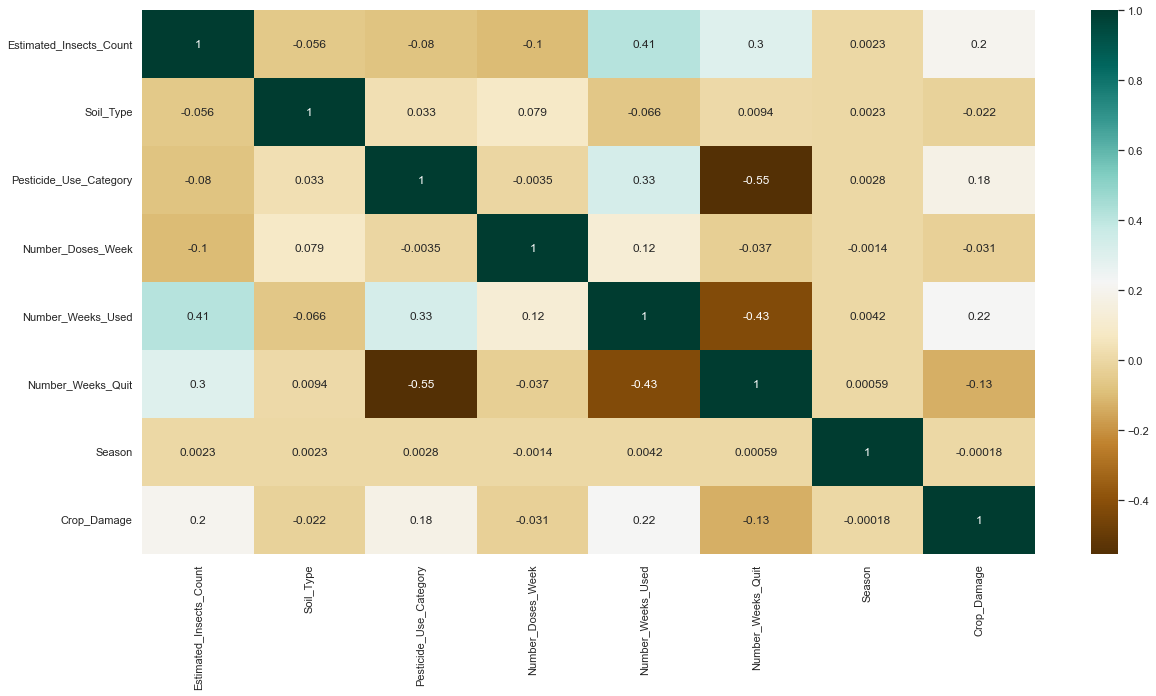

In [23]:
plt.figure(figsize=(20,10))
c=df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

Number of Weeks Used has a correlation with the Estimated Insects count and Pesticides Use Category.

# PCA

Now, to reduce the dimensionality of our dataframe by creating new columns carrying the information from the original one, we apply the PCA(Principal Component Analysis).

In [25]:
independent_variable = "Crop_Damage"

In [26]:
df_no_label = df.drop([independent_variable, "ID"], axis=1)

In [27]:
df_no_label.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,0,1,0,0.0,0,1
1,209,1,0,1,0,0.0,0,2
2,257,1,0,1,0,0.0,0,2
3,257,1,1,1,0,0.0,0,2
4,342,1,0,1,0,0.0,0,2


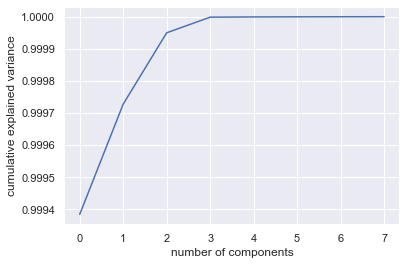

In [28]:
#df_no_label = df.drop([independent_variable, "ID"], axis=1)
pca = PCA().fit(df_no_label) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance');

We can observe that to get 100% of variance of our dataframe we only need 3 columns, so that's the number we will set for the PCA algorithm transform the data.

In [29]:
pca = PCA(3)
projected = pca.fit_transform(df_no_label)
df_pca = pd.DataFrame(projected, columns =['C1', 'C2', 'C3'])
df_pca.head()

,C1,C2,C3
0,-1211.131373,-32.107942,4.361853
1,-1190.131879,-32.093954,4.411522
2,-1142.133040,-32.061934,4.525383
3,-1142.133073,-32.060057,4.528017
4,-1057.135095,-32.005233,4.727011


Here we have our new data, now let's input our independent variable on it to complete this section.

In [30]:
df_pca[independent_variable] = df[independent_variable]
df_pca.head()

,C1,C2,C3,Crop_Damage
0,-1211.131373,-32.107942,4.361853,0
1,-1190.131879,-32.093954,4.411522,1
2,-1142.133040,-32.061934,4.525383,1
3,-1142.133073,-32.060057,4.528017,1
4,-1057.135095,-32.005233,4.727011,1


Done, that's our new dataframe which carries all the information from the original, but way more reduced and ready for machine learning models.

# Machine Learning 

- Logistic Regression
- KNN
- Decision Trees
- Random Forest
- Support Vector Machines
- XGBoost

Defining the label and features. 

In [ ]:
X = df_pca[['C1', 'C2', 'C3']]  # Features
y = df_pca[independent_variable]  # Labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 5) # 70% training and 30% test

Before applying any ML algorithm, we will check the number of values for each class in the target column to see if the data is imbalanced or not. 

In [ ]:
df_pca['Crop_Damage'].value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

As seen above, our classes are **imbalanced**. <br/>


#### Handling Imbalanced Classes

We will apply couple **oversampling methods** to make our classes balanced. Then, we will build our machine learning models with both methods and compare the results. 

##### 1- SMOTE 


In [ ]:
#importing module from imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=27)
X_smote, y_smote = sm.fit_resample(X, y)

We fit our dependent and independent variables with SMOTE module and it created synthetic data. <br/>
Let's see the number of variables for each class in our target data. 

In [ ]:
y_smote.value_counts()

0    74238
1    74238
2    74238
Name: Crop_Damage, dtype: int64

As seen above, we have balanced classes. 

##### 2- ADASYN

In [ ]:
#importing the module from imblearn
from imblearn.over_sampling import ADASYN

In [ ]:
sm = ADASYN(random_state=27)
X_adasyn, y_adasyn = sm.fit_resample(X, y)

We fit our dependent and independent variables with ADASYN module and it created synthetic data. 
Let's see the number of variables for each class in our target data.

In [ ]:
y_adasyn.value_counts()

0    74238
1    74238
2    74238
Name: Crop_Damage, dtype: int64

As seen above, we have balanced classes.

## Building Machine Learning Models

We will define custom python functions to automatize the model building part. 

In [ ]:
#importing necessary libraries
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.model_selection import GridSearchCV

In [ ]:
#function for creating the model and making prediction
def fit_predict_score(Model, X_train, y_train, X_test, y_test):
    """Fit the model of your choice, predict for test data, and returns classification metrics."""
    model = Model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    return train_score, test_score, precision_score(y_test, y_pred, average= 'macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')

#function for comparing the models
def model_comparison(X, y):
    """Creates a DataFrame comparing Logistic Regression, K-Nearest Neighbors, Decision Tree,
    Random Forest, AdaBoost, Gradient Boosting, Extra Trees, CatBoost, Support Vector Machines,
    XGBoost, and LightGBM."""
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    lr_train_score, lr_test_score, lr_pr, lr_re, lr_f1 = fit_predict_score(LogisticRegression(), X_train, y_train, X_test, y_test)
    knn_train_score, knn_test_score, knn_pr, knn_re, knn_f1 = fit_predict_score(KNeighborsClassifier(), X_train, y_train, X_test, y_test)
    dtc_train_score, dtc_test_score, dtc_pr, dtc_re, dtc_f1 = fit_predict_score(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)
    rfc_train_score, rfc_test_score, rfc_pr, rfc_re, rfc_f1 = fit_predict_score(RandomForestClassifier(), X_train, y_train, X_test, y_test)
    svc_train_score, svc_test_score, svc_pr, svc_re, svc_f1 = fit_predict_score(SVC(), X_train, y_train, X_test, y_test)
    xgbc_train_score, xgbc_test_score, xgbc_pr, xgbc_re, xgbc_f1 = fit_predict_score(XGBClassifier(verbosity=0, objective= 'reg:logistic'), X_train, y_train, X_test, y_test)
    
    models = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 'XGBoost']

    train_score = [lr_train_score, knn_train_score, dtc_train_score, rfc_train_score, svc_train_score, xgbc_train_score]
    test_score = [lr_test_score, knn_test_score, dtc_test_score, rfc_test_score, svc_test_score, xgbc_test_score]
    precision = [lr_pr, knn_pr, dtc_pr, rfc_pr, svc_pr, xgbc_pr]
    recall = [lr_re, knn_re, dtc_re, rfc_re, svc_re, xgbc_re]
    f1 = [lr_f1, knn_f1, dtc_f1, rfc_f1, svc_f1, xgbc_f1]
    
    model_comparison = pd.DataFrame(data=[models, train_score, test_score, precision, recall, f1]).T.rename({0: 'Model',
                                                                                                             1:'Training Score',
                                                                                                             2: 'Test Score (Accuracy)',
                                                                                                             3: 'Precision',
                                                                                                             4: 'Recall',
                                                                                                             5: 'F1 Score'
                                                                                                            }, axis=1)
    
    return model_comparison

We will train the models with PCA, SMOTE, and ADASYN applied data and compare the metrics of each model. 

In [ ]:
print("Default DataFrame:")
display(model_comparison(X, y))
print('-'*40)
print("\nSMOTE applied DataFrame:")
display(model_comparison(X_smote, y_smote))
print('-'*40)
print("\nADASYN applied DataFrame:")
display(model_comparison(X_adasyn, y_adasyn))

Default DataFrame:


,Model,Training Score,Test Score (Accuracy),Precision,Recall,F1 Score
0,Logistic Regression,0.83386,0.834197,0.414002,0.34127,0.321999
1,K-Nearest Neighbors,0.857157,0.821784,0.486155,0.376632,0.383476
2,Decision Tree,0.986025,0.747954,0.388183,0.390837,0.3894
3,Random Forest,0.98589,0.798118,0.419762,0.394218,0.402061
4,Support Vector Machines,0.835472,0.835459,0.278486,0.333333,0.303451
5,XGBoost,0.840495,0.839483,0.488337,0.346192,0.329695


----------------------------------------

SMOTE applied DataFrame:


,Model,Training Score,Test Score (Accuracy),Precision,Recall,F1 Score
0,Logistic Regression,0.495128,0.492762,0.482667,0.492763,0.474018
1,K-Nearest Neighbors,0.80757,0.716434,0.717938,0.715964,0.715982
2,Decision Tree,0.994143,0.725264,0.725504,0.724925,0.72518
3,Random Forest,0.994116,0.76264,0.761942,0.762289,0.762095
4,Support Vector Machines,0.497306,0.495905,0.494013,0.49554,0.487363
5,XGBoost,0.548077,0.543172,0.537986,0.542747,0.52939


----------------------------------------

ADASYN applied DataFrame:


,Model,Training Score,Test Score (Accuracy),Precision,Recall,F1 Score
0,Logistic Regression,0.493886,0.494773,0.484741,0.49293,0.472571
1,K-Nearest Neighbors,0.799004,0.703862,0.705083,0.703107,0.702771
2,Decision Tree,0.994172,0.715613,0.715282,0.714735,0.714986
3,Random Forest,0.994138,0.756039,0.754508,0.755072,0.754753
4,Support Vector Machines,0.498753,0.498785,0.495903,0.496382,0.481792
5,XGBoost,0.542334,0.540753,0.53365,0.538519,0.524835


As seen from the metrics above, we reached the **best results with default data**. Model scores decreased with SMOTE and ADASYN. <br/>

However, we can see that there is **overfitting** in Decision Tree and Random Forest models since there is a considerable difference between train and test scores. 

#### Hyperparameter Tuning (with cross-validation)

We built the models with the default parameters. <br/>
Now, we will make parameter tuning and check the results. <br/>
We will use **GridSearchCV** for parameter tuning, additionally, it has build-in **cross-validation** feature. By using the GridSearchCV, we will be using cross-validation to test the ability of the models with new data. 

In [ ]:
import time

**Logistic Regression**

In [ ]:
start = time.time()

params = {"C": [10 ** x for x in range (-5, 5, 1)],
          "penalty": ['l1', 'l2']}

lr_grid = GridSearchCV(estimator=LogisticRegression(),
                       param_grid = params,
                       cv = 5,
                       verbose=3)

lr_grid.fit(X, y)

end = time.time()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .................C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .................C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .................C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .................C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .................C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...............C=1e-05, penalty=l2;, score=0.834 total time=   4.2s
[CV 2/5] END ...............C=1e-05, penalty=l2;, score=0.834 total time=   5.3s
[CV 3/5] END ...............C=1e-05, penalty=l2;, score=0.834 total time=   3.8s
[CV 4/5] END ...............C=1e-05, penalty=l2;, score=0.834 total time=   5.2s
[CV 5/5] END ...............C=1e-05, penalty=l2;, score=0.834 total time=  10.7s
[CV 1/5] END ................C=0.0001, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ................C=0.0001, penalty=

In [ ]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Parameters : ", lr_grid.best_params_)

GridSearchCV Runtime: 4.15 minutes
Best Parameters :  {'C': 1, 'penalty': 'l2'}


**K-Nearest Neighbors**

In [ ]:
start = time.time()

params = {
    "n_neighbors": [1, 3, 5, 10, 15, 30, 50],
    "weights": ['uniform', 'distance'],
    "metric": ['minkowski', 'euclidian', 'manhattan']
}

knn_grid = GridSearchCV(estimator=KNeighborsClassifier(),
                        param_grid = params,
                        cv = 5,
                        verbose=3)

knn_grid.fit(X, y)

end = time.time()

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.750 total time=   0.6s
[CV 2/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.743 total time=   0.6s
[CV 3/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.742 total time=   0.8s
[CV 4/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.752 total time=   0.6s
[CV 5/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.747 total time=   0.7s
[CV 1/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.750 total time=   0.1s
[CV 2/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.743 total time=   0.1s
[CV 3/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.742 total time=   0.1s
[CV 4/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.752 total time=   0.1s
[CV 5/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.747 to

In [ ]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Parameters : ", knn_grid.best_params_)

GridSearchCV Runtime: 1.08 minutes
Best Parameters :  {'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}


**Decision Tree**

In [ ]:
start = time.time()

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [i for i in range(1, 10)],
    'min_samples_split': [i for i in range(1, 10)],
    'min_samples_leaf': [i for i in range(1, 5)]
}

dtc_grid = GridSearchCV(estimator = DecisionTreeClassifier(),
                        param_grid = params,
                        cv = 5,
                        verbose=3)

dtc_grid.fit(X, y)

end = time.time()

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.835 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.835 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.835 total time=   0.1s
[CV 4/5] END criterion=gin

In [ ]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Parameters : ", dtc_grid.best_params_)

GridSearchCV Runtime: 12.81 minutes
Best Parameters :  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


**Random Forest**

In [ ]:
start = time.time()

params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth' : [4, 5, 6, 7, 8, 10, 15],
    'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(estimator = RandomForestClassifier(),
                        param_grid = params,
                        cv = 5,
                        verbose=3)

rfc_grid.fit(X, y)

end = time.time()

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END criterion=gini, max_depth=4, n_estimators=100;, score=0.840 total time=   4.4s
[CV 2/5] END criterion=gini, max_depth=4, n_estimators=100;, score=0.840 total time=   4.4s
[CV 3/5] END criterion=gini, max_depth=4, n_estimators=100;, score=0.839 total time=   4.4s
[CV 4/5] END criterion=gini, max_depth=4, n_estimators=100;, score=0.840 total time=   4.4s
[CV 5/5] END criterion=gini, max_depth=4, n_estimators=100;, score=0.839 total time=   4.4s
[CV 1/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.840 total time=   9.3s
[CV 2/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.840 total time=   8.8s
[CV 3/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.839 total time=   8.7s
[CV 4/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.840 total time=   8.7s
[CV 5/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.839 total time=   8.7s
[CV 1/5] END crite

In [ ]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Parameters : ", rfc_grid.best_params_)

GridSearchCV Runtime: 164.83 minutes
Best Parameters :  {'criterion': 'gini', 'max_depth': 7, 'n_estimators': 100}


**Support Vector Machines**

In [ ]:
start = time.time()

params = {'C': [10**i for i in range(1, 2)] + [round(0.1**i,5) for i in range(5)]}

svc_grid = GridSearchCV(estimator = SVC(),
                        param_grid = params,                        
                        cv = 5,
                        verbose=3)

svc_grid.fit(X, y)

end = time.time()

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..............................C=10;, score=0.835 total time= 2.6min
[CV 2/5] END ..............................C=10;, score=0.835 total time= 2.6min
[CV 3/5] END ..............................C=10;, score=0.835 total time= 2.7min
[CV 4/5] END ..............................C=10;, score=0.835 total time= 2.6min
[CV 5/5] END ..............................C=10;, score=0.835 total time= 2.7min
[CV 1/5] END .............................C=1.0;, score=0.835 total time= 1.7min
[CV 2/5] END .............................C=1.0;, score=0.835 total time= 1.7min
[CV 3/5] END .............................C=1.0;, score=0.835 total time= 1.7min
[CV 4/5] END .............................C=1.0;, score=0.835 total time= 1.7min
[CV 5/5] END .............................C=1.0;, score=0.835 total time= 1.7min
[CV 1/5] END .............................C=0.1;, score=0.835 total time= 1.6min
[CV 2/5] END .............................C=0.1;,

In [ ]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Parameters : ", svc_grid.best_params_)

GridSearchCV Runtime: 57.53 minutes
Best Parameters :  {'C': 10}


**XGBoost**

In [ ]:
X_sample = X.sample(n=3000, random_state=42)
y_sample = y[X_sample.index]

start = time.time()

params = {
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [1, 3, 5],
    'min_child_weight': [1, 3, 5, 7, 9],
    'subsample': [0.1, 0.3, 0.5, 0.8, 1],
    'colsample_bytree': [0.1, 0.3, 0.5],
    'n_estimators' : [100, 200, 300, 400, 500],
    'objective': ['reg:squarederror']
}

xgbc_grid = GridSearchCV(estimator = XGBClassifier(),
                         param_grid = params,
                         cv = 3,
                         verbose=3)

xgbc_grid.fit(X_sample, y_sample)

end = time.time()

Streaming output truncated to the last 5000 lines.
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.8;, score=0.819 total time=   0.4s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=0.8;, score=0.823 total time=   0.3s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=1;, score=0.816 total time=   0.3s
[CV 2/3] END colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=1;, score=0.820 total time=   0.3s
[CV 3/3] END colsample_bytree=0.3, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200, objective=reg:squarederror, subsample=1;, score=0.827 total time=   0.3s
[CV 1/3] END colsample_bytree=0.3, learning_rate=0.3, m

In [ ]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print('Best Parameters: ', xgbc_grid.best_params_)

GridSearchCV Runtime: 79.49 minutes
Best Parameters:  {'colsample_bytree': 0.1, 'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 3, 'n_estimators': 200, 'objective': 'reg:squarederror', 'subsample': 1}


#### Best Parameters & Comparison

We will apply the same models with the best parameters.

In [ ]:
lr_train_score, lr_test_score, lr_pr, lr_re, lr_f1 = fit_predict_score(LogisticRegression(C=1, penalty='l2'), X_train, y_train, X_test, y_test)
knn_train_score, knn_test_score, knn_pr, knn_re, knn_f1 = fit_predict_score(KNeighborsClassifier(metric='minkowski', n_neighbors=15, weights='uniform'), X_train, y_train, X_test, y_test)
dtc_train_score, dtc_test_score, dtc_pr, dtc_re, dtc_f1 = fit_predict_score(DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=1, min_samples_split=2), X_train, y_train, X_test, y_test)
rfc_train_score, rfc_test_score, rfc_pr, rfc_re, rfc_f1 = fit_predict_score(RandomForestClassifier(criterion='gini', max_depth=7, n_estimators=100), X_train, y_train, X_test, y_test)
svc_train_score, svc_test_score, svc_pr, svc_re, svc_f1 = fit_predict_score(SVC(C=10), X_train, y_train, X_test, y_test)
xgbc_train_score, xgbc_test_score, xgbc_pr, xgbc_re, xgbc_f1 = fit_predict_score(XGBClassifier(colsample_bytree=0.1, learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=200, objective='reg:squarederror', subsample=1), X_train, y_train, X_test, y_test)

models = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 'XGBoost']

train_score = [lr_train_score, knn_train_score, dtc_train_score, rfc_train_score, svc_train_score, xgbc_train_score]
test_score = [lr_test_score, knn_test_score, dtc_test_score, rfc_test_score, svc_test_score, xgbc_test_score]
precision = [lr_pr, knn_pr, dtc_pr, rfc_pr, svc_pr, xgbc_pr]
recall = [lr_re, knn_re, dtc_re, rfc_re, svc_re, xgbc_re]
f1 = [lr_f1, knn_f1, dtc_f1, rfc_f1, svc_f1, xgbc_f1]

tuned_models = pd.DataFrame(data=[models, train_score, test_score, precision, recall, f1]).T.rename({0: 'Model',
                                                                                                     1:'Training Score',
                                                                                                     2: 'Test Score (Accuracy)',
                                                                                                     3: 'Precision',
                                                                                                     4: 'Recall',
                                                                                                     5: 'F1 Score'
                                                                                                        }, axis=1)

In [ ]:
print("Default Parameters:")
display(model_comparison(X, y))
print('-'*40)
print("\nTuned Parameters:")
display(tuned_models)

Default Parameters:


,Model,Training Score,Test Score (Accuracy),Precision,Recall,F1 Score
0,Logistic Regression,0.83386,0.834231,0.414661,0.341352,0.322154
1,K-Nearest Neighbors,0.857157,0.82175,0.48609,0.376619,0.383457
2,Decision Tree,0.986025,0.747101,0.387549,0.390908,0.389072
3,Random Forest,0.985907,0.797811,0.422224,0.396402,0.404463
4,Support Vector Machines,0.835472,0.835459,0.278486,0.333333,0.303451
5,XGBoost,0.840495,0.839483,0.488337,0.346192,0.329695


----------------------------------------

Tuned Parameters:


,Model,Training Score,Test Score (Accuracy),Precision,Recall,F1 Score
0,Logistic Regression,0.834807,0.832133,0.40396,0.339496,0.318198
1,K-Nearest Neighbors,0.843457,0.831758,0.581657,0.356457,0.350502
2,Decision Tree,0.841318,0.83791,0.4951,0.346339,0.329719
3,Random Forest,0.841061,0.837535,0.494357,0.345297,0.327726
4,Support Vector Machines,0.836174,0.833821,0.27794,0.333333,0.303127
5,XGBoost,0.840145,0.836897,0.465625,0.349279,0.336047
